In [1]:
#Drive daki dosyalara erişmek için izin verir.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#ilgili calisma klasorune gecer.
import os
os.chdir("/content/drive/MyDrive/WHU")

In [3]:
#kütüphaneleri yükle
import matplotlib.pyplot as plt
import cv2
import numpy as np
import keras
import numpy as np # linear algebra
import keras.backend as K
import time as ti
import cv2
import os
import glob # for including images
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
!ls -a

build


In [5]:
#image ve label yollarini okur, image ve labellerin adlarının aynı olmasinii sağlar.
img_pth = glob.glob(os.path.join("build/Image/", "*.png"))
img_names = [path.split('/Image/')[1].split('.png')[0] for path in img_pth]
lbl_pth = ['build/Mask/' + name + '.png' for name in img_names]

In [6]:
img_data = []
msk_data = []

In [7]:
#Images
for img_path in img_pth[1:]: #0. resim problemli dolayısyla o resim atlandi ve 289 resim üzerinden islem yapılacağı icin images[1:] yapildi..
    img = cv2.imread(img_path)
    img = cv2.resize(img, (256, 256))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_data.append(img)

img_data=np.array(img_data)

In [8]:
img_data.shape

(2999, 256, 256, 3)

In [9]:
#Mask/Label
for lbl_path in lbl_pth[1:]: #0. resim problemli dolayısyla o resim atlandi ve 289 resim üzerinden islem yapılacağı icin images[1:] yapildi..
    img = cv2.imread(lbl_path)
    img = cv2.resize(img, (256, 256))
    #maskeler binary oldugu icin as. kod eklendi.
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thresh = 127
    img = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)[1]
    msk_data.append(img)

msk_data=np.array(msk_data)

In [10]:
msk_data.shape

(2999, 256, 256)

In [11]:
#images
f = plt.figure(figsize=(16,16))
rows = 5
cols = 5
for x in range(1,26):
  f.add_subplot(rows,cols,x)
  plt.imshow(img_data[x], interpolation='nearest')
  plt.axis('off')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

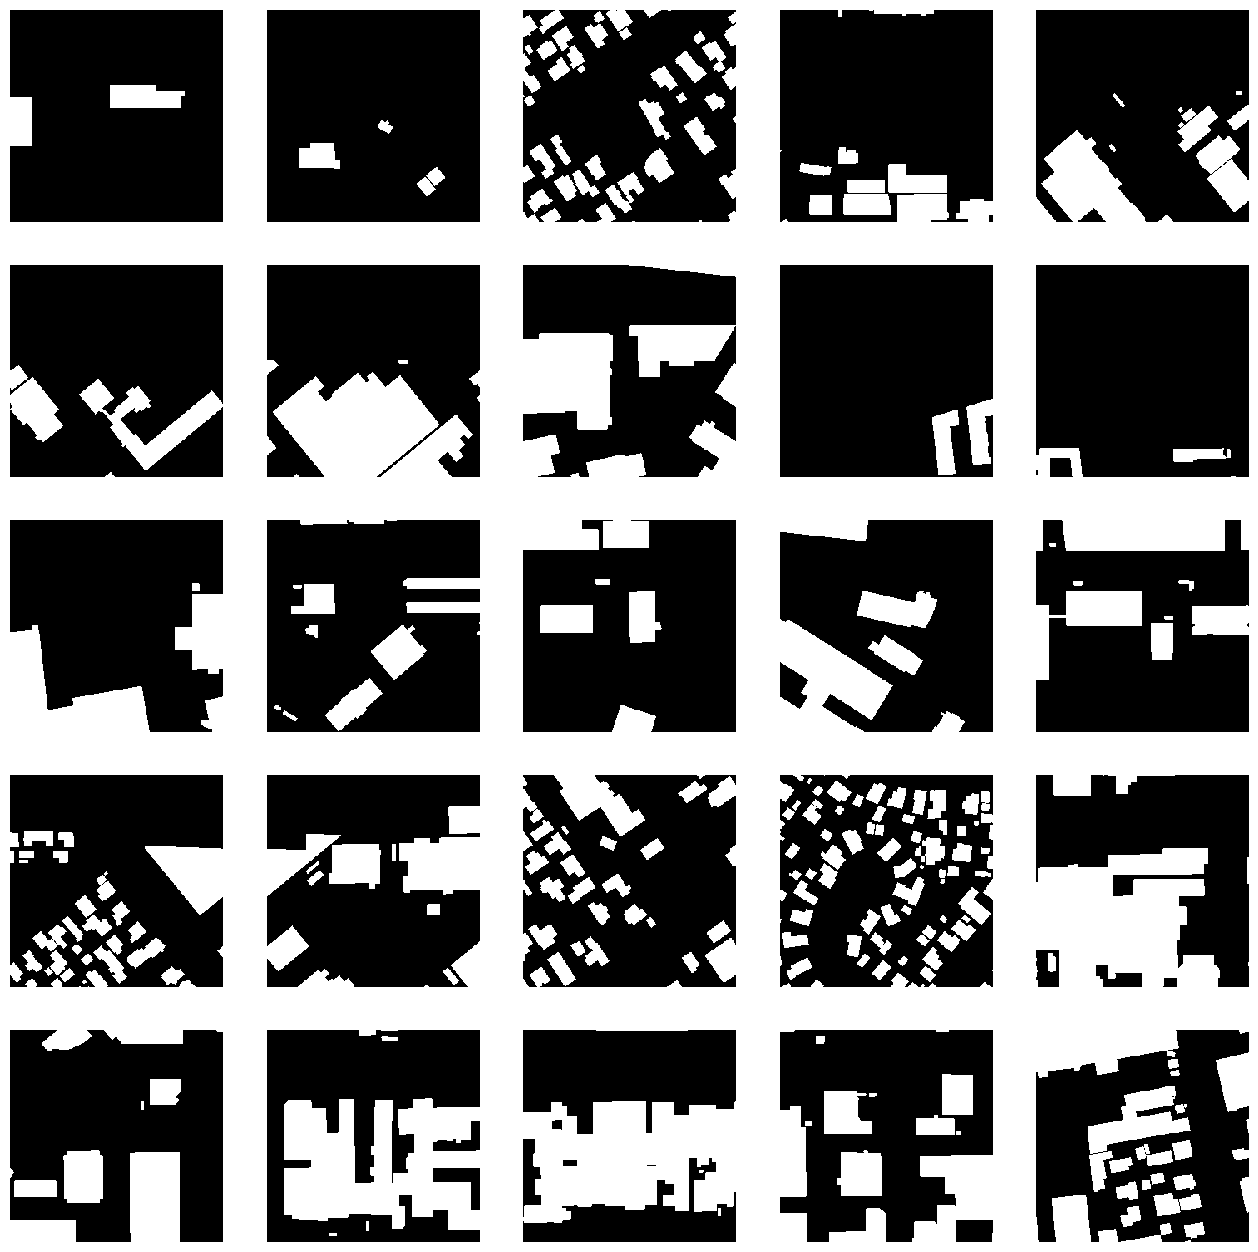

In [12]:
#masks / labels
f = plt.figure(figsize=(16,16))
rows = 5
cols = 5
for x in range(1,26):
  f.add_subplot(rows,cols,x)
  plt.imshow(msk_data[x], interpolation='nearest', cmap="gray")
  plt.axis('off')
plt.show()

In [13]:
np.unique(msk_data)

array([  0, 255], dtype=uint8)

split train, test, validation : %80, %10, %10

In [14]:
from sklearn.model_selection import train_test_split
#train data
tr_img, _img, tr_msk, _msk = train_test_split(img_data, msk_data , random_state=7, test_size=0.2, shuffle=True)
#validation and test data
vl_img, ts_img, vl_msk, ts_msk = train_test_split(_img, _msk, random_state=7, test_size=0.5, shuffle=True)

In [15]:
np.savez('WHU_build_area_train_set_80_percent.npz', tr_img=tr_img, tr_msk=tr_msk)
np.savez('WHU_build_area_val_set_10_percent.npz', vl_img=vl_img, vl_msk=vl_msk)
np.savez('WHU_build_area_test_set_10_percent.npz', ts_img=ts_img, ts_msk=ts_msk)

In [16]:
#şiimdi test verisetinden bir resmi ve labelini görüntüleyelim.
tr = np.load('WHU_build_area_train_set_80_percent.npz',allow_pickle=True)
print(tr.files)

['tr_img', 'tr_msk']


In [17]:
#isimlere göre np.array cagrilir.
tr_x = tr['tr_img']
tr_y = tr['tr_msk']

In [18]:
#image
f = plt.figure(figsize=(16,16))
rows = 5
cols = 5
for x in range(1,26):
  f.add_subplot(rows,cols,x)
  plt.imshow(tr_x[x])
  plt.axis('off')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

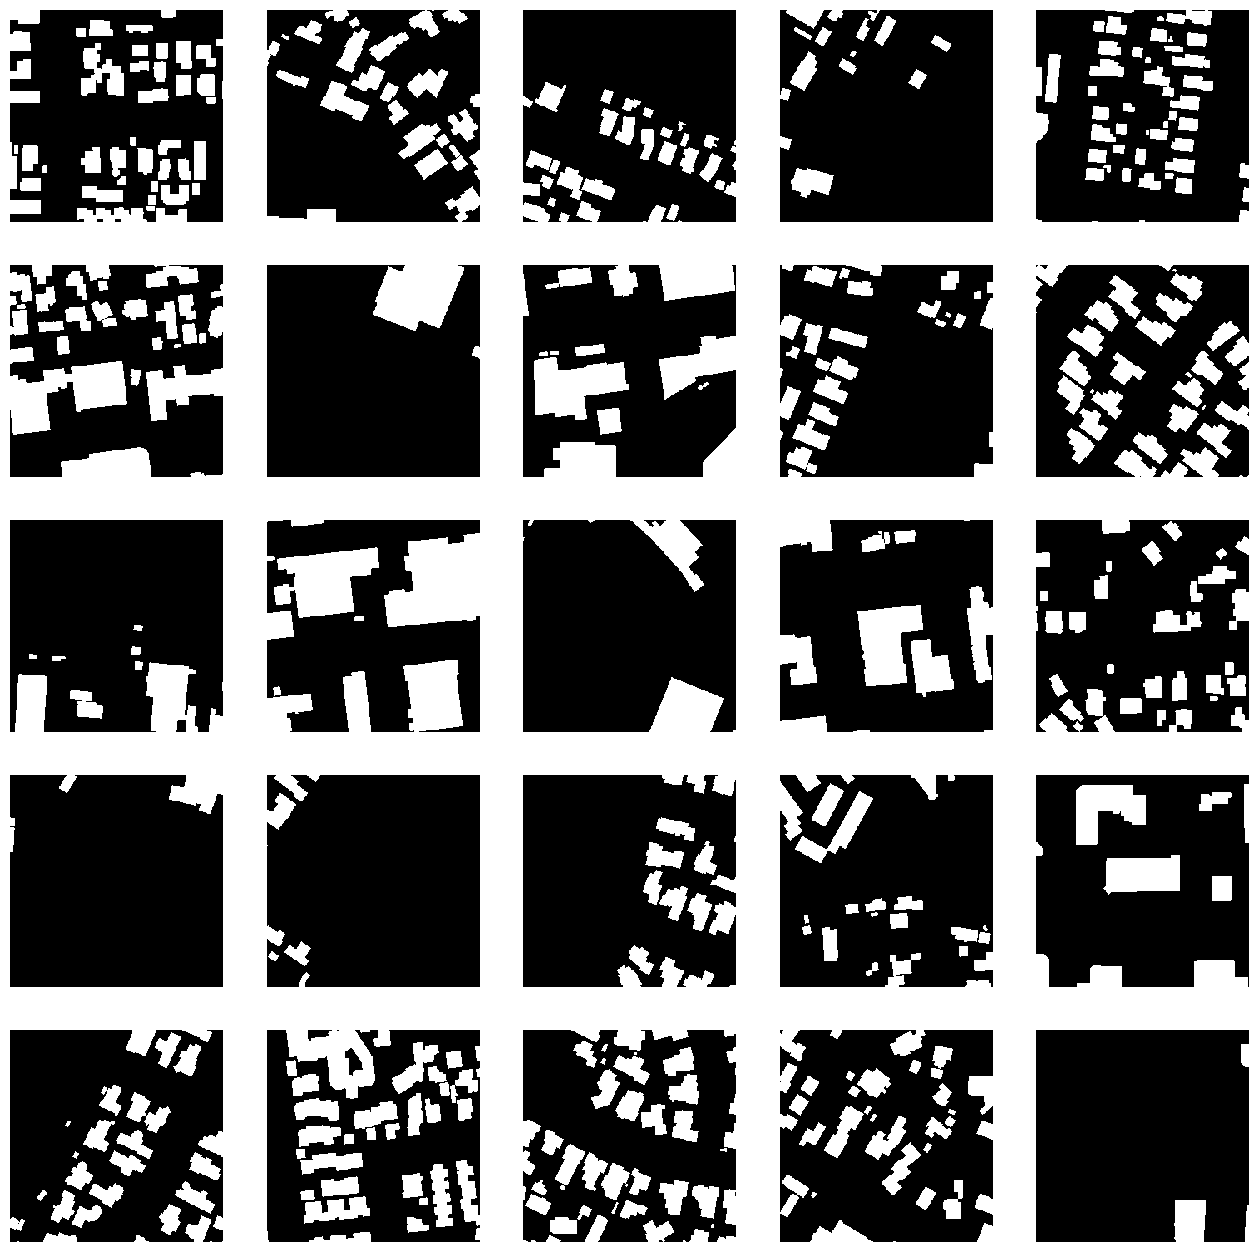

In [19]:
#segmentation
f = plt.figure(figsize=(16,16))
rows = 5
cols = 5
for x in range(1,26):
  f.add_subplot(rows,cols,x)
  plt.imshow(tr_y[x], interpolation='nearest', cmap="gray")
  plt.axis('off')
plt.show()